In [110]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
data = pd.read_parquet('archive/UNSW_NB15_training-set.parquet')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 36 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   dur                175341 non-null  float32 
 1   proto              175341 non-null  category
 2   service            175341 non-null  category
 3   state              175341 non-null  category
 4   spkts              175341 non-null  int16   
 5   dpkts              175341 non-null  int16   
 6   sbytes             175341 non-null  int32   
 7   dbytes             175341 non-null  int32   
 8   rate               175341 non-null  float32 
 9   sload              175341 non-null  float32 
 10  dload              175341 non-null  float32 
 11  sloss              175341 non-null  int16   
 12  dloss              175341 non-null  int16   
 13  sinpkt             175341 non-null  float32 
 14  dinpkt             175341 non-null  float32 
 15  sjit               175341 non-null

In [6]:
data = data.replace([np.inf, -np.inf], np.nan)

In [7]:
null_counts = data.isnull().sum()
# Print the number of null values
print(f"{null_counts.sum()} null entries have been found in the dataset\n")
# Drop null values
data.dropna(inplace=True)          # or df_data = df_data.dropna()

# Find and handle duplicates
duplicate_count = data.duplicated().sum()
# Print the number of duplicate entries
print(f"{duplicate_count} duplicate entries have been found in the dataset\n")
# Remove duplicates
data.drop_duplicates(inplace=True)  # or df_data = df_data.drop_duplicates()
# Display relative message
print(f"All duplicates have been removed\n")

# Reset the indexes
data.reset_index(drop=True, inplace=True)

# Inspect the dataset for categorical columns
print("Categorical columns:",data.select_dtypes(include=['object']).columns.tolist(),'\n')

# Print the first 5 lines
data.head()

0 null entries have been found in the dataset

78519 duplicate entries have been found in the dataset

All duplicates have been removed

Categorical columns: [] 



,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sload,...,trans_depth,response_body_len,ct_src_dport_ltm,ct_dst_sport_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,is_sm_ips_ports,attack_cat,label
0,0.121478,tcp,-,FIN,6,4,258,172,74.087486,14158.942383,...,0,0,1,1,0,0,0,0,Normal,0
1,0.649902,tcp,-,FIN,14,38,734,42014,78.473373,8395.112305,...,0,0,1,1,0,0,0,0,Normal,0
2,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,1572.271851,...,0,0,1,1,0,0,0,0,Normal,0
3,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,2740.178955,...,0,0,1,1,1,1,0,0,Normal,0
4,0.449454,tcp,-,FIN,10,6,534,268,33.373825,8561.499023,...,0,0,2,1,0,0,0,0,Normal,0


In [8]:
data = data.dropna()

In [9]:
data.columns

Index(['dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt',
       'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt',
       'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'is_sm_ips_ports',
       'attack_cat', 'label'],
      dtype='object')

In [10]:
drop_columns = [ # this list includes all spellings across CIC NIDS datasets
    'proto', 'service', 'state'
]
data.drop(columns=drop_columns, inplace=True, errors='ignore')  

In [11]:
data['attack_cat'].value_counts()

Normal            48894
Exploits          19360
Fuzzers           14082
Reconnaissance     6000
DoS                3369
Generic            1800
Backdoor           1121
Analysis           1119
Shellcode           954
Worms               123
Name: attack_cat, dtype: int64

In [12]:
data['label'].value_counts()

0    48894
1    47928
Name: label, dtype: int64

In [13]:
del data['attack_cat']

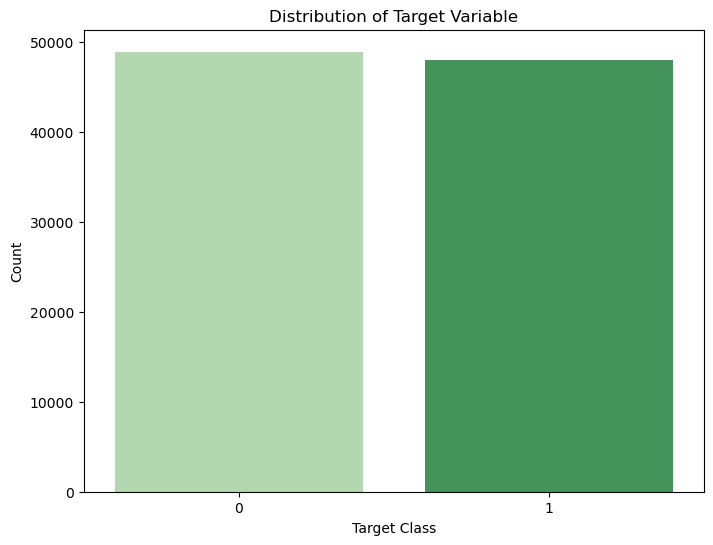

In [14]:
# Plotting the distribution of the binary target variable y
plt.figure(figsize=(8, 6))
sns.countplot(x=data['label'], palette='Greens')
plt.title('Distribution of Target Variable')
plt.xlabel('Target Class')
plt.ylabel('Count')
plt.show()

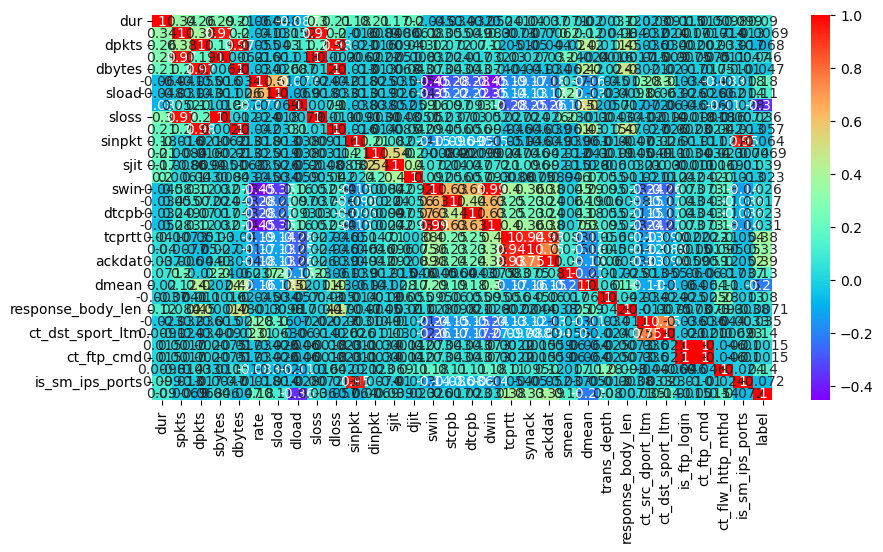

In [15]:
plt.figure(figsize = (10,5))
sns.heatmap(data.corr(), annot = True, cmap="rainbow")
plt.show()

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96822 entries, 0 to 96821
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   dur                96822 non-null  float32
 1   spkts              96822 non-null  int16  
 2   dpkts              96822 non-null  int16  
 3   sbytes             96822 non-null  int32  
 4   dbytes             96822 non-null  int32  
 5   rate               96822 non-null  float32
 6   sload              96822 non-null  float32
 7   dload              96822 non-null  float32
 8   sloss              96822 non-null  int16  
 9   dloss              96822 non-null  int16  
 10  sinpkt             96822 non-null  float32
 11  dinpkt             96822 non-null  float32
 12  sjit               96822 non-null  float32
 13  djit               96822 non-null  float32
 14  swin               96822 non-null  int16  
 15  stcpb              96822 non-null  int64  
 16  dtcpb              968

In [17]:
X = data.drop(["label"],axis =1)
y = data["label"]

# FS

In [18]:
from sklearn.feature_selection import SelectKBest, SelectPercentile, mutual_info_classif

In [19]:
selector = SelectPercentile(mutual_info_classif, percentile=30)
X_reduced = selector.fit_transform(X, y)
#X_reduced.shape

In [20]:
cols = selector.get_support(indices=True)
selected_columns = X.iloc[:,cols].columns.tolist()
selected_columns

['sbytes',
 'dbytes',
 'rate',
 'dinpkt',
 'tcprtt',
 'synack',
 'ackdat',
 'smean',
 'dmean']

In [21]:
len(selected_columns)

9

In [22]:
data = data[['sbytes',
             'dbytes',
             'rate',
             'dinpkt',
             'tcprtt',
             'synack',
             'ackdat',
             'smean',
             'dmean','label']]

In [23]:
data.to_csv('processed.csv')

In [24]:
df = pd.read_csv('processed.csv')

In [25]:
del df['Unnamed: 0']

In [26]:
X = df.drop(["label"],axis =1)
y = df["label"]

In [28]:
from keras.utils.np_utils import to_categorical
Y = to_categorical(y)
Y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42)

In [30]:
from sklearn.metrics import accuracy_score # for calculating accuracy of model
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [169]:
ML_Model = []
accuracy = []
precision = []
recall = []
f1score = []
auc = []

#function to call for storing the results
def storeResults(model, a,b,c,d,e):
    ML_Model.append(model)
    accuracy.append(round(a, 3))
    precision.append(round(b, 3))
    recall.append(round(c, 3))
    f1score.append(round(d, 3))
    auc.append(round(e, 3))

In [32]:
from tensorflow import keras
callback = keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=5)

In [33]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# ANN

In [171]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=42)
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [66]:
model = Sequential()
model.add(Dense(64, input_dim=9, activation='relu',kernel_initializer='glorot_uniform'))
model.add(Dense(32,activation='relu',kernel_initializer='glorot_uniform'))
model.add(Dense(16,activation='relu',kernel_initializer='glorot_uniform'))
model.add(Dense(2, activation='sigmoid'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy',f1_m,precision_m, recall_m])

In [67]:
history=model.fit(X_train,y_train,epochs=20,validation_data = (X_test,y_test),callbacks=[callback])

Epoch 1/20
1816/1816 [==============================] - 11s 6ms/step - loss: 0.2992 - accuracy: 0.8760 - f1_m: 0.8746 - precision_m: 0.8787 - recall_m: 0.8709 - val_loss: 0.2792 - val_accuracy: 0.8814 - val_f1_m: 0.8812 - val_precision_m: 0.8830 - val_recall_m: 0.8796
Epoch 2/20
1816/1816 [==============================] - 10s 5ms/step - loss: 0.2665 - accuracy: 0.8877 - f1_m: 0.8874 - precision_m: 0.8872 - recall_m: 0.8876 - val_loss: 0.2717 - val_accuracy: 0.8816 - val_f1_m: 0.8831 - val_precision_m: 0.8760 - val_recall_m: 0.8905
Epoch 3/20
1816/1816 [==============================] - 9s 5ms/step - loss: 0.2588 - accuracy: 0.8908 - f1_m: 0.8908 - precision_m: 0.8866 - recall_m: 0.8952 - val_loss: 0.2645 - val_accuracy: 0.8858 - val_f1_m: 0.8865 - val_precision_m: 0.8848 - val_recall_m: 0.8881
Epoch 4/20
1816/1816 [==============================] - 9s 5ms/step - loss: 0.2527 - accuracy: 0.8922 - f1_m: 0.8925 - precision_m: 0.8854 - recall_m: 0.8999 - val_loss: 0.2585 - val_accuracy: 0

In [170]:
dl_acc = history.history["val_accuracy"][16]
dl_prec = history.history["val_precision_m"][16]
dl_rec = history.history["val_recall_m"][16]
dl_f1 = history.history["val_f1_m"][16]
dl_roc = roc_auc_score(y_test, model.predict(X_test))

storeResults('ANN',dl_acc,dl_prec,dl_rec,dl_f1,dl_roc)

606/606 [==============================] - 4s 5ms/step


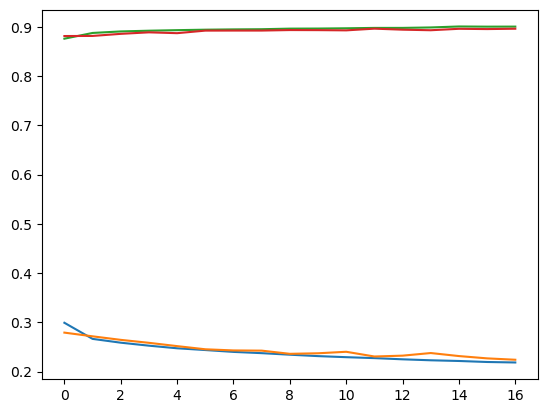

In [68]:
plt.plot(history.history['loss'])

plt.plot(history.history['val_loss'])

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

# CNN

In [80]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

In [81]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping

In [82]:
def build_model(input_shape):
    model = Sequential()
    
    model.add(Conv1D(64, 1, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(1))
    model.add(Dropout(0.1))
    
    model.add(Conv1D(32, 2, activation='relu'))  # Added another convolutional layer
    model.add(MaxPooling1D(2))  # Increased pooling window size
    model.add(Dropout(0.1))  # Adjusted dropout rate
    
    model.add(Conv1D(16, 2, activation='relu'))  # Added another convolutional layer
    model.add(MaxPooling1D(1))  # Increased pooling window size
    model.add(Dropout(0.1))  # Adjusted dropout rate
        
    model.add(Flatten())
    model.add(Dense(8, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(2, activation='sigmoid'))  # Assuming binary classification
    return model

In [83]:
# Build the model
model1 = build_model((X_train.shape[1], 1))

# Compile the model (assuming learning rate and optimizer values are chosen)
model1.compile(loss='categorical_crossentropy', metrics=['accuracy',f1_m,precision_m, recall_m])

In [84]:
history1 = model1.fit(X_train, y_train, epochs=20, batch_size=2, 
                    validation_data=(X_test, y_test),  verbose=1,callbacks=[callback])

Epoch 1/20
38729/38729 [==============================] - 258s 7ms/step - loss: 0.3987 - accuracy: 0.8581 - f1_m: 0.8030 - precision_m: 0.8476 - recall_m: 0.7807 - val_loss: 0.3311 - val_accuracy: 0.8782 - val_f1_m: 0.7345 - val_precision_m: 0.8300 - val_recall_m: 0.6868
Epoch 2/20
38729/38729 [==============================] - 279s 7ms/step - loss: 0.4099 - accuracy: 0.8621 - f1_m: 0.3248 - precision_m: 0.4356 - recall_m: 0.2694 - val_loss: 0.3421 - val_accuracy: 0.8775 - val_f1_m: 0.1473 - val_precision_m: 0.2110 - val_recall_m: 0.1155
Epoch 3/20
38729/38729 [==============================] - 264s 7ms/step - loss: 0.4154 - accuracy: 0.8579 - f1_m: 0.1180 - precision_m: 0.1708 - recall_m: 0.0916 - val_loss: 0.3667 - val_accuracy: 0.8459 - val_f1_m: 0.1405 - val_precision_m: 0.2013 - val_recall_m: 0.1100
Epoch 4/20
38729/38729 [==============================] - 254s 7ms/step - loss: 0.4207 - accuracy: 0.8423 - f1_m: 0.0957 - precision_m: 0.1393 - recall_m: 0.0738 - val_loss: 0.3503 - v

In [175]:
dl_acc = history1.history["val_accuracy"][5]
dl_prec = history1.history["val_precision_m"][5]
dl_rec = history1.history["val_recall_m"][5]
dl_f1 = history1.history["val_f1_m"][5]
dl_roc = roc_auc_score(y_test, model1.predict(X_test))

storeResults('CNN',dl_acc,dl_prec,dl_rec,dl_f1,dl_roc)

606/606 [==============================] - 1s 1ms/step


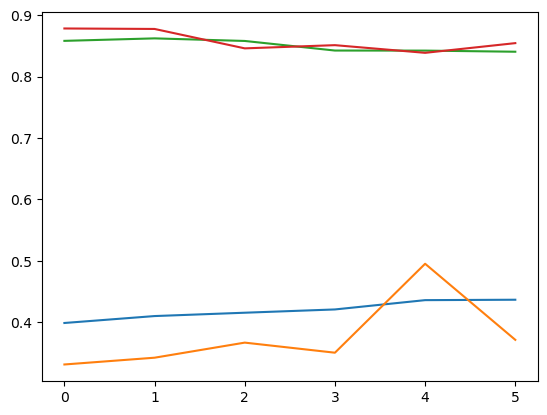

In [85]:
plt.plot(history1.history['loss'])

plt.plot(history1.history['val_loss'])

plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])

# RNN

In [161]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, LSTM, SimpleRNN, Bidirectional
from tensorflow.keras.optimizers import RMSprop

In [177]:
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [88]:
model2 = Sequential()
model2.add(SimpleRNN(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model2.add(Dropout(0.5))
model2.add(Dense(2, activation='sigmoid'))

learning_rate = 0.001
optimizer = RMSprop(learning_rate=learning_rate)
model2.compile(loss='categorical_crossentropy', metrics=['accuracy',f1_m,precision_m, recall_m])

In [89]:
history2 = model2.fit(X_train, y_train, epochs=20, batch_size=2, 
                    validation_data=(X_test, y_test),  verbose=1,callbacks=[callback])

Epoch 1/20
38729/38729 [==============================] - 213s 5ms/step - loss: 0.5620 - accuracy: 0.7990 - f1_m: 0.8005 - precision_m: 0.7897 - recall_m: 0.8190 - val_loss: 0.5652 - val_accuracy: 0.8316 - val_f1_m: 0.8282 - val_precision_m: 0.8225 - val_recall_m: 0.8378
Epoch 2/20
38729/38729 [==============================] - 212s 5ms/step - loss: 0.5391 - accuracy: 0.8075 - f1_m: 0.8066 - precision_m: 0.7937 - recall_m: 0.8298 - val_loss: 0.5086 - val_accuracy: 0.7946 - val_f1_m: 0.8047 - val_precision_m: 0.7766 - val_recall_m: 0.8479
Epoch 3/20
38729/38729 [==============================] - 212s 5ms/step - loss: 0.5180 - accuracy: 0.8143 - f1_m: 0.8082 - precision_m: 0.7842 - recall_m: 0.8496 - val_loss: 0.4956 - val_accuracy: 0.8267 - val_f1_m: 0.8182 - val_precision_m: 0.8023 - val_recall_m: 0.8428
Epoch 4/20
38729/38729 [==============================] - 212s 5ms/step - loss: 0.4917 - accuracy: 0.8245 - f1_m: 0.8140 - precision_m: 0.7934 - recall_m: 0.8537 - val_loss: 0.4778 - v

In [178]:
dl_acc = history2.history["val_accuracy"][19]
dl_prec = history2.history["val_precision_m"][19]
dl_rec = history2.history["val_recall_m"][19]
dl_f1 = history2.history["val_f1_m"][19]
dl_roc = roc_auc_score(y_test, model2.predict(X_test))

storeResults('RNN',dl_acc,dl_prec,dl_rec,dl_f1,dl_roc)

606/606 [==============================] - 1s 1ms/step


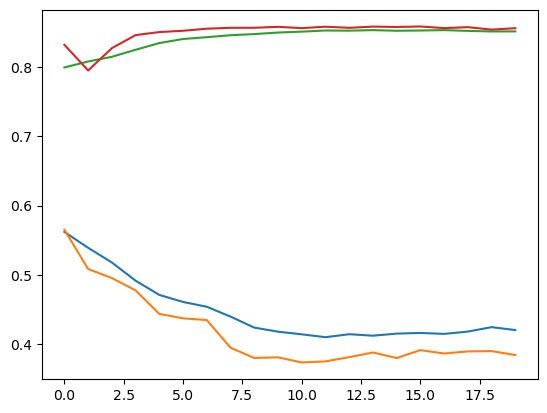

In [90]:
plt.plot(history2.history['loss'])

plt.plot(history2.history['val_loss'])

plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])

# LSTM

In [91]:
model3 = Sequential()
model3.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model3.add(Dropout(0.5))
model3.add(Dense(2, activation='sigmoid'))

learning_rate = 0.001
optimizer = RMSprop(learning_rate=learning_rate)
model3.compile(loss='categorical_crossentropy', metrics=['accuracy',f1_m,precision_m, recall_m])

In [92]:
history3 = model3.fit(X_train, y_train, epochs=20, batch_size=2, 
                    validation_data=(X_test, y_test),  verbose=1,callbacks=[callback])

Epoch 1/20
38729/38729 [==============================] - 251s 6ms/step - loss: 0.5256 - accuracy: 0.8134 - f1_m: 0.8133 - precision_m: 0.8137 - recall_m: 0.8151 - val_loss: 0.4820 - val_accuracy: 0.8380 - val_f1_m: 0.8384 - val_precision_m: 0.8366 - val_recall_m: 0.8411
Epoch 2/20
38729/38729 [==============================] - 247s 6ms/step - loss: 0.4649 - accuracy: 0.8404 - f1_m: 0.8401 - precision_m: 0.8394 - recall_m: 0.8444 - val_loss: 0.4568 - val_accuracy: 0.8571 - val_f1_m: 0.8571 - val_precision_m: 0.8571 - val_recall_m: 0.8577
Epoch 3/20
38729/38729 [==============================] - 246s 6ms/step - loss: 0.4559 - accuracy: 0.8461 - f1_m: 0.8437 - precision_m: 0.8435 - recall_m: 0.8505 - val_loss: 0.4444 - val_accuracy: 0.8529 - val_f1_m: 0.8530 - val_precision_m: 0.8533 - val_recall_m: 0.8531
Epoch 4/20
38729/38729 [==============================] - 247s 6ms/step - loss: 0.4510 - accuracy: 0.8474 - f1_m: 0.8400 - precision_m: 0.8420 - recall_m: 0.8497 - val_loss: 0.4225 - v

In [179]:
dl_acc = history3.history["val_accuracy"][14]
dl_prec = history3.history["val_precision_m"][14]
dl_rec = history3.history["val_recall_m"][14]
dl_f1 = history3.history["val_f1_m"][14]
dl_roc = roc_auc_score(y_test, model3.predict(X_test))

storeResults('LSTM',dl_acc,dl_prec,dl_rec,dl_f1,dl_roc)

606/606 [==============================] - 1s 2ms/step


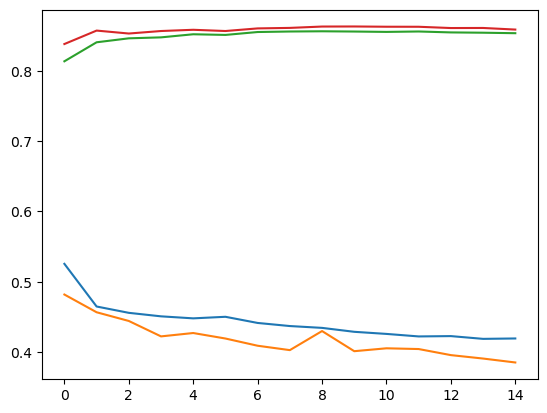

In [93]:
plt.plot(history3.history['loss'])

plt.plot(history3.history['val_loss'])

plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])

# CNN + LSTM

In [180]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

In [158]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout, BatchNormalization, Reshape, GRU

In [96]:
def build_model(input_shape):
    model = Sequential()
    model.add(Conv1D(32, 1, activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(1))
    model.add(Dropout(0.1))
    model.add(Flatten())
    # Mengubah bentuk ke (batch_size, timesteps, features)
    model.add(Reshape((input_shape[0], 32)))
    model.add(LSTM(50, activation='tanh', return_sequences=False))
    model.add(Dropout(0.1))
    model.add(Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
    model.add(Dropout(0.1))
    model.add(Dense(2, activation='sigmoid'))
    return model

In [97]:
model4 = build_model((X_train.shape[1], 1))
model4.compile(loss='categorical_crossentropy', metrics=['accuracy',f1_m,precision_m, recall_m])
model4.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_11 (Conv1D)          (None, 9, 32)             64        
                                                                 
 batch_normalization (BatchN  (None, 9, 32)            128       
 ormalization)                                                   
                                                                 
 max_pooling1d_11 (MaxPoolin  (None, 9, 32)            0         
 g1D)                                                            
                                                                 
 dropout_28 (Dropout)        (None, 9, 32)             0         
                                                                 
 flatten_2 (Flatten)         (None, 288)               0         
                                                                 
 reshape (Reshape)           (None, 9, 32)           

In [111]:
history4 = model4.fit(X_train, y_train, epochs=20, batch_size=2, 
                    validation_data=(X_test, y_test),  verbose=1,callbacks=[callback])

Epoch 1/20
38729/38729 [==============================] - 364s 9ms/step - loss: 0.3924 - accuracy: 0.8616 - f1_m: 0.8611 - precision_m: 0.8623 - recall_m: 0.8606 - val_loss: 0.3587 - val_accuracy: 0.8631 - val_f1_m: 0.8630 - val_precision_m: 0.8632 - val_recall_m: 0.8629
Epoch 2/20
38729/38729 [==============================] - 367s 9ms/step - loss: 0.4024 - accuracy: 0.8567 - f1_m: 0.8564 - precision_m: 0.8574 - recall_m: 0.8559 - val_loss: 0.3419 - val_accuracy: 0.8731 - val_f1_m: 0.8727 - val_precision_m: 0.8731 - val_recall_m: 0.8725
Epoch 3/20
38729/38729 [==============================] - 366s 9ms/step - loss: 0.4095 - accuracy: 0.8544 - f1_m: 0.8542 - precision_m: 0.8547 - recall_m: 0.8539 - val_loss: 0.3630 - val_accuracy: 0.8625 - val_f1_m: 0.8625 - val_precision_m: 0.8625 - val_recall_m: 0.8625
Epoch 4/20
38729/38729 [==============================] - 363s 9ms/step - loss: 0.4061 - accuracy: 0.8544 - f1_m: 0.8544 - precision_m: 0.8544 - recall_m: 0.8546 - val_loss: 0.3621 - v

In [181]:
dl_acc = history4.history["val_accuracy"][12]
dl_prec = history4.history["val_precision_m"][12]
dl_rec = history4.history["val_recall_m"][12]
dl_f1 = history4.history["val_f1_m"][12]
dl_roc = roc_auc_score(y_test, model4.predict(X_test))

storeResults('CNN+LSTM',dl_acc,dl_prec,dl_rec,dl_f1,dl_roc)

606/606 [==============================] - 2s 2ms/step


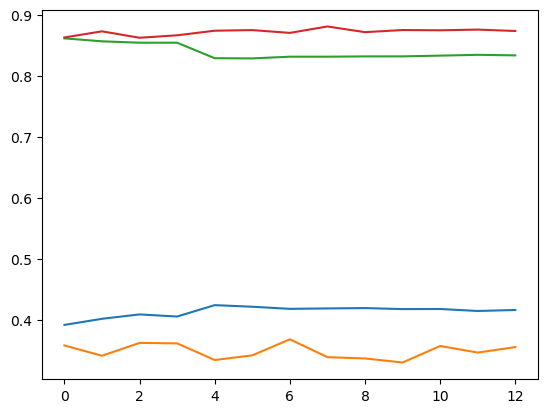

In [112]:
plt.plot(history4.history['loss'])

plt.plot(history4.history['val_loss'])

plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])

# ANN + CNN

In [113]:
def build_model(input_shape):
    model = Sequential()
    
    model.add(Conv1D(64, 1, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(1))
    model.add(Dropout(0.1))
    
    model.add(Conv1D(32, 2, activation='relu'))  # Added another convolutional layer
    model.add(MaxPooling1D(2))  # Increased pooling window size
    model.add(Dropout(0.1))  # Adjusted dropout rate
    
    model.add(Dense(128, activation="relu"))
    model.add(Dropout(0.2))

        
    model.add(Flatten())
    model.add(Dense(8, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(2, activation='sigmoid'))  # Assuming binary classification
    return model

In [114]:
# Build the model
model5 = build_model((X_train.shape[1], 1))
model5.compile(loss='categorical_crossentropy', metrics=['accuracy',f1_m,precision_m, recall_m])
model5.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_14 (Conv1D)          (None, 9, 64)             128       
                                                                 
 max_pooling1d_14 (MaxPoolin  (None, 9, 64)            0         
 g1D)                                                            
                                                                 
 dropout_42 (Dropout)        (None, 9, 64)             0         
                                                                 
 conv1d_15 (Conv1D)          (None, 8, 32)             4128      
                                                                 
 max_pooling1d_15 (MaxPoolin  (None, 4, 32)            0         
 g1D)                                                            
                                                                 
 dropout_43 (Dropout)        (None, 4, 32)           

In [115]:
history5 = model5.fit(X_train, y_train, epochs=20, batch_size=2, 
                    validation_data=(X_test, y_test),  verbose=1,callbacks=[callback])

Epoch 1/20
38729/38729 [==============================] - 273s 7ms/step - loss: 0.4030 - accuracy: 0.8412 - f1_m: 0.6992 - precision_m: 0.5722 - recall_m: 0.9427 - val_loss: 0.3445 - val_accuracy: 0.8524 - val_f1_m: 0.6664 - val_precision_m: 0.4999 - val_recall_m: 0.9996
Epoch 2/20
38729/38729 [==============================] - 270s 7ms/step - loss: 0.4173 - accuracy: 0.7925 - f1_m: 0.6460 - precision_m: 0.5126 - recall_m: 0.9104 - val_loss: 0.3773 - val_accuracy: 0.7951 - val_f1_m: 0.6851 - val_precision_m: 0.5578 - val_recall_m: 0.9144
Epoch 3/20
38729/38729 [==============================] - 269s 7ms/step - loss: 0.4319 - accuracy: 0.7584 - f1_m: 0.6389 - precision_m: 0.5224 - recall_m: 0.8716 - val_loss: 0.3401 - val_accuracy: 0.8277 - val_f1_m: 0.6657 - val_precision_m: 0.5954 - val_recall_m: 0.8122
Epoch 4/20
38729/38729 [==============================] - 269s 7ms/step - loss: 0.4454 - accuracy: 0.8026 - f1_m: 0.5881 - precision_m: 0.5212 - recall_m: 0.7386 - val_loss: 0.4315 - v

In [182]:
dl_acc = history5.history["val_accuracy"][5]
dl_prec = history5.history["val_precision_m"][5]
dl_rec = history5.history["val_recall_m"][5]
dl_f1 = history5.history["val_f1_m"][5]
dl_roc = roc_auc_score(y_test, model5.predict(X_test))

storeResults('CNN+ANN',dl_acc,dl_prec,dl_rec,dl_f1,dl_roc)

606/606 [==============================] - 1s 2ms/step


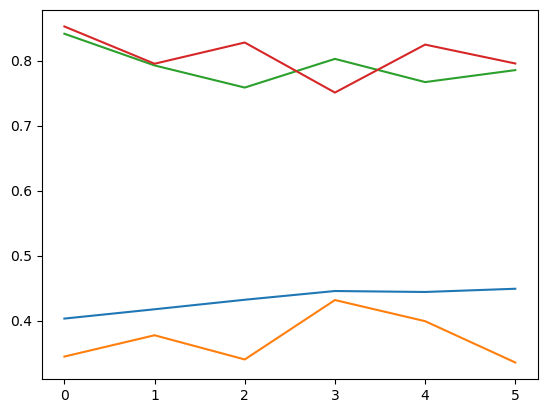

In [116]:
plt.plot(history5.history['loss'])

plt.plot(history5.history['val_loss'])

plt.plot(history5.history['accuracy'])
plt.plot(history5.history['val_accuracy'])

# RNN + ANN

In [104]:
model6 = Sequential()
model6.add(SimpleRNN(50, input_shape=(X_train.shape[1],1)))
model6.add(Dropout(0.5))
model6.add(Dense(128, activation="relu"))
model6.add(Dropout(0.2))  
model6.add(Flatten())
model6.add(Dense(8, activation='relu'))
model6.add(Dropout(0.1))
model6.add(Dense(2, activation='sigmoid'))

learning_rate = 0.001
optimizer = RMSprop(learning_rate=learning_rate)
model6.compile(loss='categorical_crossentropy', metrics=['accuracy',f1_m,precision_m, recall_m])
model6.summary()

In [105]:
history6 = model6.fit(X_train, y_train, epochs=20, batch_size=2, 
                    validation_data=(X_test, y_test),  verbose=1,callbacks=[callback])

In [183]:
dl_acc = history6.history["val_accuracy"][9]
dl_prec = history6.history["val_precision_m"][9]
dl_rec = history6.history["val_recall_m"][9]
dl_f1 = history6.history["val_f1_m"][9]
dl_roc = roc_auc_score(y_test, model6.predict(X_test))

storeResults('RNN+ANN',dl_acc,dl_prec,dl_rec,dl_f1,dl_roc)

606/606 [==============================] - 2s 3ms/step


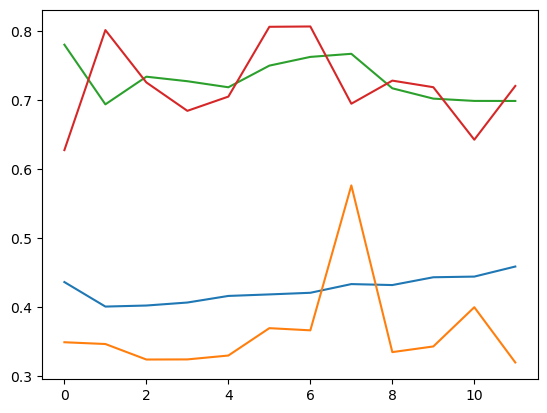

In [117]:
plt.plot(history6.history['loss'])

plt.plot(history6.history['val_loss'])

plt.plot(history6.history['accuracy'])
plt.plot(history6.history['val_accuracy'])

# LSTM + RNN

In [125]:
x_train_srnn = np.copy(X_train)
x_test_srnn = np.copy(X_test)
y_train_srnn = np.copy(y_train)
y_test_srnn = np.copy(y_test)

In [131]:
model7 = Sequential()
model7.add(SimpleRNN(units=64, input_shape=(x_train_srnn.shape[1], 1), return_sequences=True))
model7.add(SimpleRNN(units=64, return_sequences=True))
model7.add(LSTM(units=64, return_sequences=False))
model7.add(Dense(units=2, activation='sigmoid'))
model7.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy',f1_m,precision_m, recall_m])

In [132]:
#model7 = create_model(input_shape=(9,1))
model7.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_18 (SimpleRNN)   (None, 9, 64)             4224      
                                                                 
 simple_rnn_19 (SimpleRNN)   (None, 9, 64)             8256      
                                                                 
 lstm_19 (LSTM)              (None, 64)                33024     
                                                                 
 dense_42 (Dense)            (None, 2)                 130       
                                                                 
Total params: 45,634
Trainable params: 45,634
Non-trainable params: 0
_________________________________________________________________


In [133]:
history7 = model7.fit(x_train_srnn, y_train, epochs=20, batch_size=16, 
                    validation_data=(x_test_srnn, y_test),  verbose=1,callbacks=[callback])

Epoch 1/20
4842/4842 [==============================] - 120s 24ms/step - loss: 0.3072 - accuracy: 0.8742 - f1_m: 0.8667 - precision_m: 0.8781 - recall_m: 0.8572 - val_loss: 0.2769 - val_accuracy: 0.8846 - val_f1_m: 0.8747 - val_precision_m: 0.8877 - val_recall_m: 0.8631
Epoch 2/20
4842/4842 [==============================] - 121s 25ms/step - loss: 0.2662 - accuracy: 0.8872 - f1_m: 0.8784 - precision_m: 0.8935 - recall_m: 0.8654 - val_loss: 0.2574 - val_accuracy: 0.8876 - val_f1_m: 0.8641 - val_precision_m: 0.8999 - val_recall_m: 0.8337
Epoch 3/20
4842/4842 [==============================] - 130s 27ms/step - loss: 0.2501 - accuracy: 0.8904 - f1_m: 0.8772 - precision_m: 0.9029 - recall_m: 0.8551 - val_loss: 0.2504 - val_accuracy: 0.8913 - val_f1_m: 0.8852 - val_precision_m: 0.8994 - val_recall_m: 0.8727
Epoch 4/20
4842/4842 [==============================] - 117s 24ms/step - loss: 0.2442 - accuracy: 0.8922 - f1_m: 0.8817 - precision_m: 0.9036 - recall_m: 0.8628 - val_loss: 0.2380 - val_a

In [184]:
dl_acc = history7.history["val_accuracy"][19]
dl_prec = history7.history["val_precision_m"][19]
dl_rec = history7.history["val_recall_m"][19]
dl_f1 = history7.history["val_f1_m"][19]
dl_roc = roc_auc_score(y_test, model7.predict(X_test))

storeResults('RNN+LSTM',dl_acc,dl_prec,dl_rec,dl_f1,dl_roc)

606/606 [==============================] - 4s 5ms/step


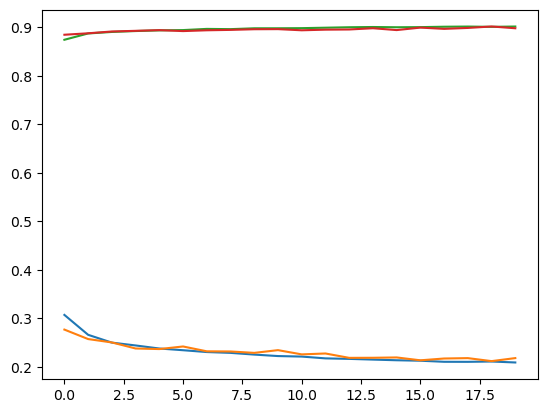

In [134]:
plt.plot(history7.history['loss'])

plt.plot(history7.history['val_loss'])

plt.plot(history7.history['accuracy'])
plt.plot(history7.history['val_accuracy'])

# CNN + LSTM + RNN + ANN

In [136]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

In [185]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

In [186]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [152]:
def build_model(input_shape):
    model = Sequential()
    model.add(Conv1D(32, 1, activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(1))
    model.add(Dropout(0.1))
    model.add(Flatten())
    # Mengubah bentuk ke (batch_size, timesteps, features)
    model.add(Reshape((input_shape[0], 32)))
    model.add(LSTM(50, activation='tanh', return_sequences=True))
    model.add(Dropout(0.5))
    model.add(LSTM(100, activation='tanh', return_sequences=True))
    model.add(Dropout(0.5))
    model.add(SimpleRNN(150, activation='tanh', return_sequences=False))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='sigmoid'))
    return model

In [153]:
model8 = build_model((X_train.shape[1], 1))
model8.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy',f1_m,precision_m, recall_m])
model8.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_20 (Conv1D)          (None, 9, 32)             64        
                                                                 
 batch_normalization_3 (Batc  (None, 9, 32)            128       
 hNormalization)                                                 
                                                                 
 max_pooling1d_20 (MaxPoolin  (None, 9, 32)            0         
 g1D)                                                            
                                                                 
 dropout_73 (Dropout)        (None, 9, 32)             0         
                                                                 
 flatten_8 (Flatten)         (None, 288)               0         
                                                                 
 reshape_3 (Reshape)         (None, 9, 32)           

In [154]:
history8 = model8.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test), verbose=1)

Epoch 1/20
4842/4842 [==============================] - 107s 21ms/step - loss: 0.4036 - accuracy: 0.8608 - f1_m: 0.8548 - precision_m: 0.8616 - recall_m: 0.8489 - val_loss: 0.3067 - val_accuracy: 0.8763 - val_f1_m: 0.8759 - val_precision_m: 0.8767 - val_recall_m: 0.8752
Epoch 2/20
4842/4842 [==============================] - 102s 21ms/step - loss: 0.3136 - accuracy: 0.8818 - f1_m: 0.8775 - precision_m: 0.8820 - recall_m: 0.8737 - val_loss: 0.3090 - val_accuracy: 0.8834 - val_f1_m: 0.8835 - val_precision_m: 0.8840 - val_recall_m: 0.8831
Epoch 3/20
4842/4842 [==============================] - 101s 21ms/step - loss: 0.3000 - accuracy: 0.8847 - f1_m: 0.8773 - precision_m: 0.8862 - recall_m: 0.8696 - val_loss: 0.2757 - val_accuracy: 0.8878 - val_f1_m: 0.8874 - val_precision_m: 0.8894 - val_recall_m: 0.8855
Epoch 4/20
4842/4842 [==============================] - 102s 21ms/step - loss: 0.2902 - accuracy: 0.8867 - f1_m: 0.8779 - precision_m: 0.8888 - recall_m: 0.8686 - val_loss: 0.2730 - val_a

In [187]:
dl_acc = history8.history["val_accuracy"][19]
dl_prec = history8.history["val_precision_m"][19]
dl_rec = history8.history["val_recall_m"][19]
dl_f1 = history8.history["val_f1_m"][19]
dl_roc = roc_auc_score(y_test, model8.predict(X_test))

storeResults('CNN+RNN+LSTM+ANN',dl_acc,dl_prec,dl_rec,dl_f1,dl_roc)

606/606 [==============================] - 3s 4ms/step


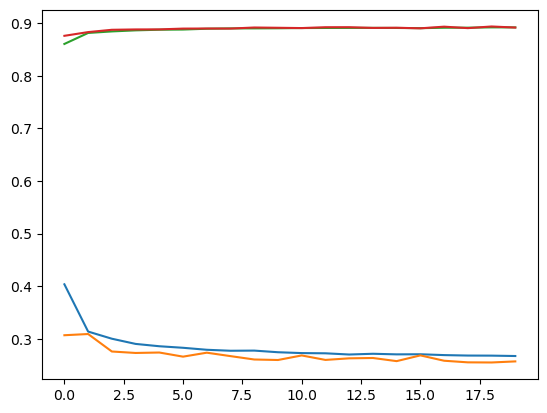

In [155]:
plt.plot(history8.history['loss'])

plt.plot(history8.history['val_loss'])

plt.plot(history8.history['accuracy'])
plt.plot(history8.history['val_accuracy'])

# CNN + LSTM + GRU

In [156]:
def build_model(input_shape):
    model = Sequential()
    model.add(Conv1D(32, 1, activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(1))
    model.add(Dropout(0.1))
    model.add(Flatten())
    # Mengubah bentuk ke (batch_size, timesteps, features)
    model.add(Reshape((input_shape[0], 32)))
    model.add(LSTM(50, activation='tanh', return_sequences=True))
    model.add(Dropout(0.5))
    model.add(LSTM(100, activation='tanh', return_sequences=True))
    model.add(Dropout(0.5))
    model.add(GRU(150, activation='tanh', return_sequences=False))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='sigmoid'))
    return model

In [159]:
model9 = build_model((X_train.shape[1], 1))
model9.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy',f1_m,precision_m, recall_m])
model9.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_22 (Conv1D)          (None, 9, 32)             64        
                                                                 
 batch_normalization_5 (Batc  (None, 9, 32)            128       
 hNormalization)                                                 
                                                                 
 max_pooling1d_22 (MaxPoolin  (None, 9, 32)            0         
 g1D)                                                            
                                                                 
 dropout_81 (Dropout)        (None, 9, 32)             0         
                                                                 
 flatten_10 (Flatten)        (None, 288)               0         
                                                                 
 reshape_5 (Reshape)         (None, 9, 32)           

In [163]:
history9 = model9.fit(X_train, y_train, epochs=20, batch_size=2, validation_data=(X_test, y_test), verbose=1)

Epoch 1/20
9683/9683 [==============================] - 121s 13ms/step - loss: 0.3676 - accuracy: 0.8676 - f1_m: 0.8594 - precision_m: 0.8634 - recall_m: 0.8619 - val_loss: 0.3366 - val_accuracy: 0.8808 - val_f1_m: 0.8706 - val_precision_m: 0.8247 - val_recall_m: 0.9245
Epoch 2/20
9683/9683 [==============================] - 120s 12ms/step - loss: 0.3430 - accuracy: 0.8740 - f1_m: 0.8607 - precision_m: 0.8677 - recall_m: 0.8626 - val_loss: 0.3124 - val_accuracy: 0.8823 - val_f1_m: 0.8826 - val_precision_m: 0.8840 - val_recall_m: 0.8813
Epoch 3/20
9683/9683 [==============================] - 120s 12ms/step - loss: 0.3353 - accuracy: 0.8764 - f1_m: 0.8659 - precision_m: 0.8685 - recall_m: 0.8706 - val_loss: 0.3164 - val_accuracy: 0.8801 - val_f1_m: 0.8799 - val_precision_m: 0.8768 - val_recall_m: 0.8833
Epoch 4/20
9683/9683 [==============================] - 121s 13ms/step - loss: 0.3370 - accuracy: 0.8762 - f1_m: 0.8671 - precision_m: 0.8716 - recall_m: 0.8692 - val_loss: 0.3154 - val_a

In [188]:
dl_acc = history9.history["val_accuracy"][19]
dl_prec = history9.history["val_precision_m"][19]
dl_rec = history9.history["val_recall_m"][19]
dl_f1 = history9.history["val_f1_m"][19]
dl_roc = roc_auc_score(y_test, model9.predict(X_test))

storeResults('CNN+LSTM+GRU',dl_acc,dl_prec,dl_rec,dl_f1,dl_roc)

606/606 [==============================] - 3s 4ms/step


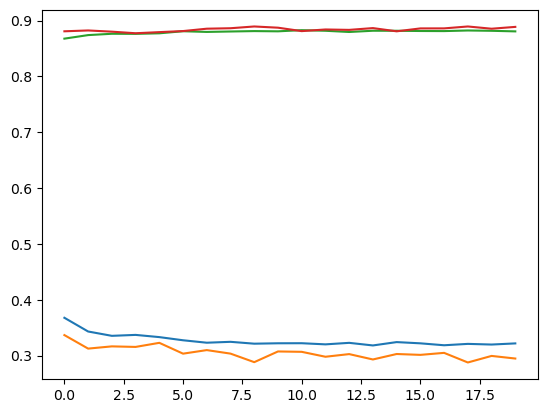

In [164]:
plt.plot(history9.history['loss'])

plt.plot(history9.history['val_loss'])

plt.plot(history9.history['accuracy'])
plt.plot(history9.history['val_accuracy'])

# CNN + BiLSTM + BiGRU

In [165]:
def build_model(input_shape):
    model = Sequential()
    model.add(Conv1D(32, 1, activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(1))
    model.add(Dropout(0.1))
    model.add(Flatten())
    # Mengubah bentuk ke (batch_size, timesteps, features)
    model.add(Reshape((input_shape[0], 32)))
    model.add(Bidirectional(LSTM(50, activation='tanh', return_sequences=True)))
    model.add(Dropout(0.5))
    model.add(Bidirectional(LSTM(100, activation='tanh', return_sequences=True)))
    model.add(Dropout(0.5))
    model.add(Bidirectional(GRU(150, activation='tanh', return_sequences=False)))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='sigmoid'))
    return model

In [166]:
model10 = build_model((X_train.shape[1], 1))
model10.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy',f1_m,precision_m, recall_m])
model10.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_23 (Conv1D)          (None, 9, 32)             64        
                                                                 
 batch_normalization_6 (Batc  (None, 9, 32)            128       
 hNormalization)                                                 
                                                                 
 max_pooling1d_23 (MaxPoolin  (None, 9, 32)            0         
 g1D)                                                            
                                                                 
 dropout_86 (Dropout)        (None, 9, 32)             0         
                                                                 
 flatten_11 (Flatten)        (None, 288)               0         
                                                                 
 reshape_6 (Reshape)         (None, 9, 32)           

In [167]:
history10 = model10.fit(X_train, y_train, epochs=20, batch_size=2, validation_data=(X_test, y_test), verbose=1)

Epoch 1/20
9683/9683 [==============================] - 248s 25ms/step - loss: 0.4456 - accuracy: 0.8368 - f1_m: 0.8229 - precision_m: 0.8008 - recall_m: 0.8602 - val_loss: 0.3414 - val_accuracy: 0.8746 - val_f1_m: 0.8746 - val_precision_m: 0.8745 - val_recall_m: 0.8747
Epoch 2/20
9683/9683 [==============================] - 238s 25ms/step - loss: 0.3670 - accuracy: 0.8688 - f1_m: 0.8528 - precision_m: 0.8423 - recall_m: 0.8722 - val_loss: 0.3283 - val_accuracy: 0.8704 - val_f1_m: 0.8747 - val_precision_m: 0.8710 - val_recall_m: 0.8802
Epoch 3/20
9683/9683 [==============================] - 237s 24ms/step - loss: 0.3611 - accuracy: 0.8686 - f1_m: 0.8493 - precision_m: 0.8418 - recall_m: 0.8683 - val_loss: 0.3298 - val_accuracy: 0.8754 - val_f1_m: 0.8754 - val_precision_m: 0.8753 - val_recall_m: 0.8755
Epoch 4/20
9683/9683 [==============================] - 240s 25ms/step - loss: 0.3521 - accuracy: 0.8713 - f1_m: 0.8476 - precision_m: 0.8389 - recall_m: 0.8674 - val_loss: 0.3179 - val_a

In [191]:
dl_acc = history10.history["val_accuracy"][19]
dl_prec = history10.history["val_precision_m"][19]
dl_rec = history10.history["val_recall_m"][19]
dl_f1 = history10.history["val_f1_m"][19]
dl_roc = roc_auc_score(y_test, model10.predict(X_test))

storeResults('CNN+BiLSTM+BiGRU',dl_acc,dl_prec,dl_rec,dl_f1,dl_roc)

606/606 [==============================] - 5s 6ms/step


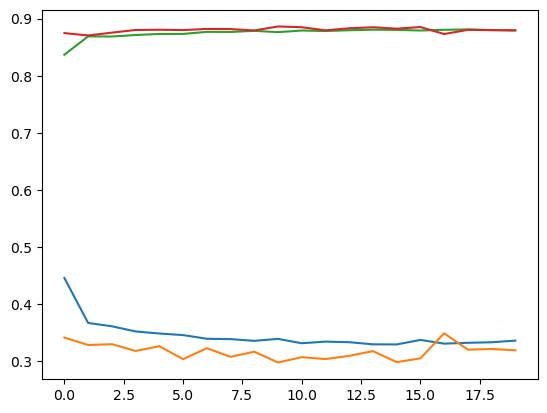

In [190]:
plt.plot(history10.history['loss'])

plt.plot(history10.history['val_loss'])

plt.plot(history10.history['accuracy'])
plt.plot(history10.history['val_accuracy'])

# Comparison

In [192]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                       'Precision': precision,
                       'Recall'   : recall, 
                       'F1_score' : f1score 
                      }) 

In [193]:
result

,ML Model,Accuracy,Precision,Recall,F1_score
0,ANN,0.896,0.885,0.913,0.899
1,CNN,0.854,0.251,0.140,0.177
2,RNN,0.856,0.859,0.855,0.855
3,LSTM,0.859,0.792,0.924,0.843
4,CNN+LSTM,0.874,0.874,0.874,0.874
5,CNN+ANN,0.795,0.510,0.993,0.673
6,RNN+ANN,0.719,0.519,0.465,0.465
7,RNN+LSTM,0.898,0.919,0.861,0.888
8,CNN+RNN+LSTM+ANN,0.892,0.895,0.889,0.892
9,CNN+LSTM+GRU,0.889,0.888,0.889,0.889


# Modelling

In [229]:
model7.save('model1.h5')

In [195]:
model9.save('model.h5')

# Graph

In [196]:
classifier = ML_Model
y_pos = np.arange(len(classifier))

# Accuracy

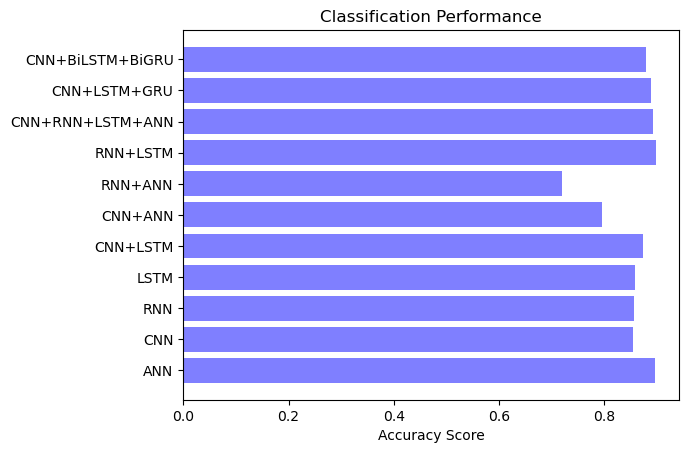

In [197]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, accuracy, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Accuracy Score')
plt2.title('Classification Performance')
plt2.show()

# Precision

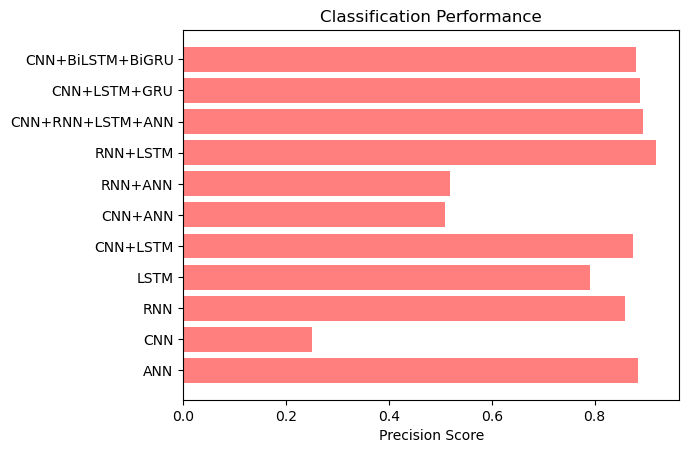

In [198]:
plt2.barh(y_pos, precision, align='center', alpha=0.5,color='red')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Precision Score')
plt2.title('Classification Performance')
plt2.show()

# Recall

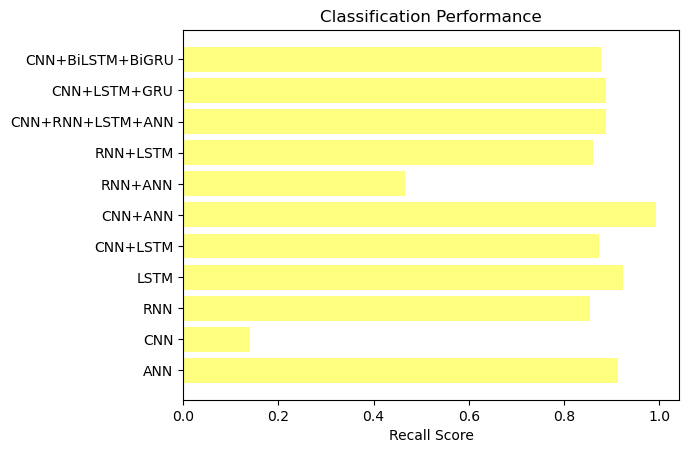

In [199]:
plt2.barh(y_pos, recall, align='center', alpha=0.5,color='yellow')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Recall Score')
plt2.title('Classification Performance')
plt2.show()

# F1 Score

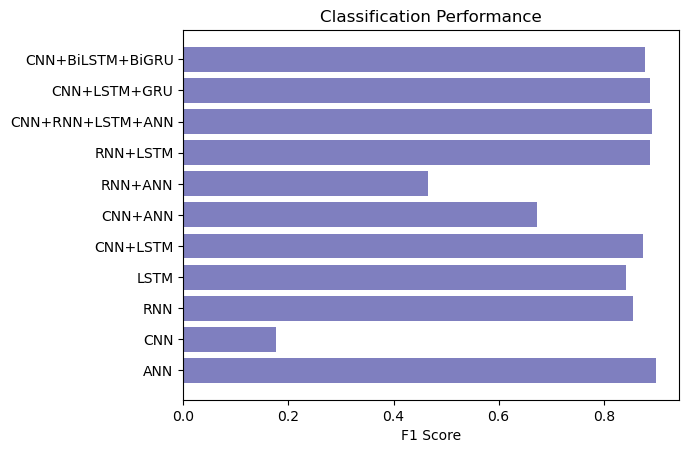

In [200]:
plt2.barh(y_pos, f1score, align='center', alpha=0.5,color='navy')
plt2.yticks(y_pos, classifier)
plt2.xlabel('F1 Score')
plt2.title('Classification Performance')
plt2.show()


# ROC AUC

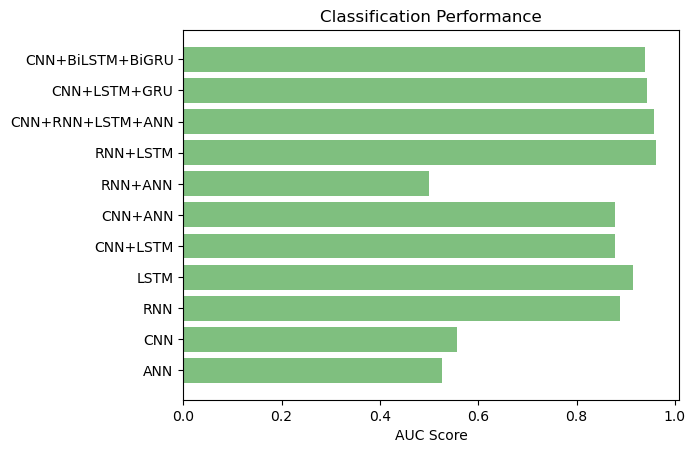

In [202]:
plt2.barh(y_pos, auc , align='center', alpha=0.5,color='green')
plt2.yticks(y_pos, classifier)
plt2.xlabel('AUC Score')
plt2.title('Classification Performance')
plt2.show()

# Prediction

In [230]:
from tensorflow.keras.models import Model, load_model

model = load_model('model1.h5',compile=False)

In [243]:
int_features = [2640,0,125000,0,0,0,0,1320,0
]
dj = np.asarray(int_features)
dj = dj.reshape(-1,9,1)

In [244]:
prediction_proba = model.predict(dj)
predict=np.argmax(prediction_proba,axis=1)

1/1 [==============================] - 0s 248ms/step


In [245]:
predict

array([1], dtype=int64)

In [246]:
predict[0]

1

In [247]:
if predict == 0:
    output='Benign Android Attack is Detected!'
elif predict == 1:
    output='Malware Android Attack is Detected!'

In [248]:
output

'Malware Android Attack is Detected!'